Working with pandas for data analysis
data used is gathered from zameen.com and consist of realestate price in pakistan using several features like location, area etc
we will predict the price of the house based on all the features
first we need to clean the data using pandas

In [4]:
import pandas as pd 
#to read from a csv file do pd.read_csv('')
#to read from an excel file do pd.read_excel('')

housing = pd.read_csv('/content/drive/MyDrive/freespirited/Property_with_Feature_Engineering.csv')
housing.head()


#The code import pandas as pd, housing = pd.read_csv('/content/drive/MyDrive/freespirited/Property_with_Feature_Engineering.csv'), 
#and housing.head() reads a CSV file named "Property_with_Feature_Engineering.csv" located in the Google Drive folder "/content/drive/MyDrive/freespirited/" 
#using the Pandas library.

#The pd.read_csv() function reads the CSV file and converts it into a Pandas DataFrame,
# which is then assigned to the housing variable. 
#The housing.head() function displays the first 5 rows of the DataFrame to provide a preview of the data.
# This is useful for checking that the file was read correctly and for getting an idea of the data's structure and content.

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,8,04-04-2019,2019,4,4,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",...,11.0,2994.76,For Sale,6,04-04-2019,2019,4,4,NaN,NaN


In [5]:
#To print the headers (i.e., column names) of the DataFrame housing created in the previous code snippet, you can use the .columns attribute of the DataFrame.
print(housing.columns)



Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'price_bin', 'location', 'city', 'province_name', 'locality',
       'latitude', 'longitude', 'baths', 'area', 'area_marla', 'area_sqft',
       'purpose', 'bedrooms', 'date_added', 'year', 'month', 'day', 'agency',
       'agent'],
      dtype='object')


##correlation
In machine learning, correlation refers to the statistical relationship between two or more variables. Correlation analysis is often used to identify which variables in a dataset are related to each other, as well as to identify patterns and insights that can be used to make predictions.

In machine learning, correlation analysis can be used for feature selection, where highly correlated features are often reduced to a single feature to reduce the risk of overfitting. Correlation analysis can also be used to identify important relationships between features and the target variable, which can then be leveraged to build accurate predictive models.

In [6]:
##look for corelations 
corr_matrix = housing.corr()
##now let's have a look at how much each attribute correlates with the price
corr_matrix["price"].sort_values(ascending=False)

<ipython-input-6-d25ddaa7e7f2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


price          1.000000
bedrooms       0.303069
baths          0.219297
area_sqft      0.021809
area_marla     0.021809
year           0.016298
month         -0.018600
property_id   -0.039687
day           -0.046424
longitude     -0.049790
location_id   -0.081339
latitude      -0.084885
Name: price, dtype: float64

##Data Cleaning
Cleaning data is a critical step in the machine learning process to ensure that the data is accurate, consistent, and complete. Inaccurate and incomplete data can negatively impact the performance of machine learning models and lead to incorrect predictions, while inconsistent data can introduce biases and make it difficult to extract useful insights.

Data cleaning involves identifying and correcting errors and inconsistencies in the data, such as missing values, duplicates, outliers, incorrect data types, and formatting issues. This can be a time-consuming and challenging process, but it's important to ensure the accuracy and reliability of the results produced by machine learning models.

Cleaning the data also involves feature selection and feature engineering, which help to identify the most relevant and informative variables for prediction. This can help to reduce the computational cost of training the machine learning models and improve the accuracy of the predictions.

In [7]:
print(housing.columns)
housing.head()

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'price_bin', 'location', 'city', 'province_name', 'locality',
       'latitude', 'longitude', 'baths', 'area', 'area_marla', 'area_sqft',
       'purpose', 'bedrooms', 'date_added', 'year', 'month', 'day', 'agency',
       'agent'],
      dtype='object')


,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,8,04-04-2019,2019,4,4,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",...,11.0,2994.76,For Sale,6,04-04-2019,2019,4,4,NaN,NaN


In [8]:
#we are also going to drop area in kanal and will go with marla
housing = housing.drop(columns=['area', 'property_id','location_id','page_url','property_type','province_name', 'city', 'price_bin',
                                'locality', 'date_added', 'month', 'day', 'agency',
       'agent','area_sqft'], axis = 1)
housing.head()

,price,location,latitude,longitude,baths,area_marla,purpose,bedrooms,year
0,220000000,Model Town,31.483869,74.325686,0,120.0,For Sale,0,2019
1,40000000,Multan Road,31.431593,74.179980,5,20.0,For Sale,5,2018
2,9500000,Eden,31.499348,74.416959,0,9.0,For Sale,3,2019
3,125000000,Gulberg,31.522069,74.355512,7,20.0,For Sale,8,2019
4,21000000,Allama Iqbal Town,31.506483,74.286017,5,11.0,For Sale,6,2019


In [9]:
housing = housing.drop(columns = ['location'], axis=1)
housing.head()

,price,latitude,longitude,baths,area_marla,purpose,bedrooms,year
0,220000000,31.483869,74.325686,0,120.0,For Sale,0,2019
1,40000000,31.431593,74.179980,5,20.0,For Sale,5,2018
2,9500000,31.499348,74.416959,0,9.0,For Sale,3,2019
3,125000000,31.522069,74.355512,7,20.0,For Sale,8,2019
4,21000000,31.506483,74.286017,5,11.0,For Sale,6,2019


In [10]:
#now let's change the purpose to a numerical value
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_pur = housing["purpose"]
housing_pur_encoded = encoder.fit_transform(housing_pur)
housing_pur_encoded
housing['purpose'] = housing_pur_encoded
print(encoder.classes_)
housing.head()

#This code snippet demonstrates how to use the LabelEncoder class from the scikit-learn library to encode categorical data in a Pandas DataFrame housing.
# Specifically, it encodes values in the "purpose" column of the DataFrame,
# which represents the purpose of a property (e.g., "rental", "vacation", "primary residence", etc.).

['For Rent' 'For Sale']


,price,latitude,longitude,baths,area_marla,purpose,bedrooms,year
0,220000000,31.483869,74.325686,0,120.0,1,0,2019
1,40000000,31.431593,74.179980,5,20.0,1,5,2018
2,9500000,31.499348,74.416959,0,9.0,1,3,2019
3,125000000,31.522069,74.355512,7,20.0,1,8,2019
4,21000000,31.506483,74.286017,5,11.0,1,6,2019


###Discover and Visualize the Data to Gain Insights
Data visualization is an essential component of machine learning (ML) because it provides a way to visually explore and communicate complex patterns and relationships in large and diverse datasets. By using data visualization tools and techniques, ML practitioners can gain insights into their data that would otherwise be difficult if not impossible to detect.

Some reasons why data visualization is important in ML include:

    Understanding the Data: Visualization can help you understand the properties of your dataset, identifying patterns and structures, and detecting anomalies or outliers.

    Feature Selection: Visualization makes it easier to explore the relationships between features in your dataset and to identify the most relevant features for your models.

    Model Evaluation: Visualizing the output of your models can provide insights into how well they are performing, helping you to diagnose issues and refine your approach.

    Communication: Visualization is an essential tool for communicating the results of your analysis to others who may not be familiar with the data or the models you are using.

Overall, data visualization is essential in every step of ML, from data preprocessing to model selection and deployment. It is a powerful tool for understanding complex data and for making decisions based on data-driven insights.

<function matplotlib.pyplot.show(close=None, block=None)>

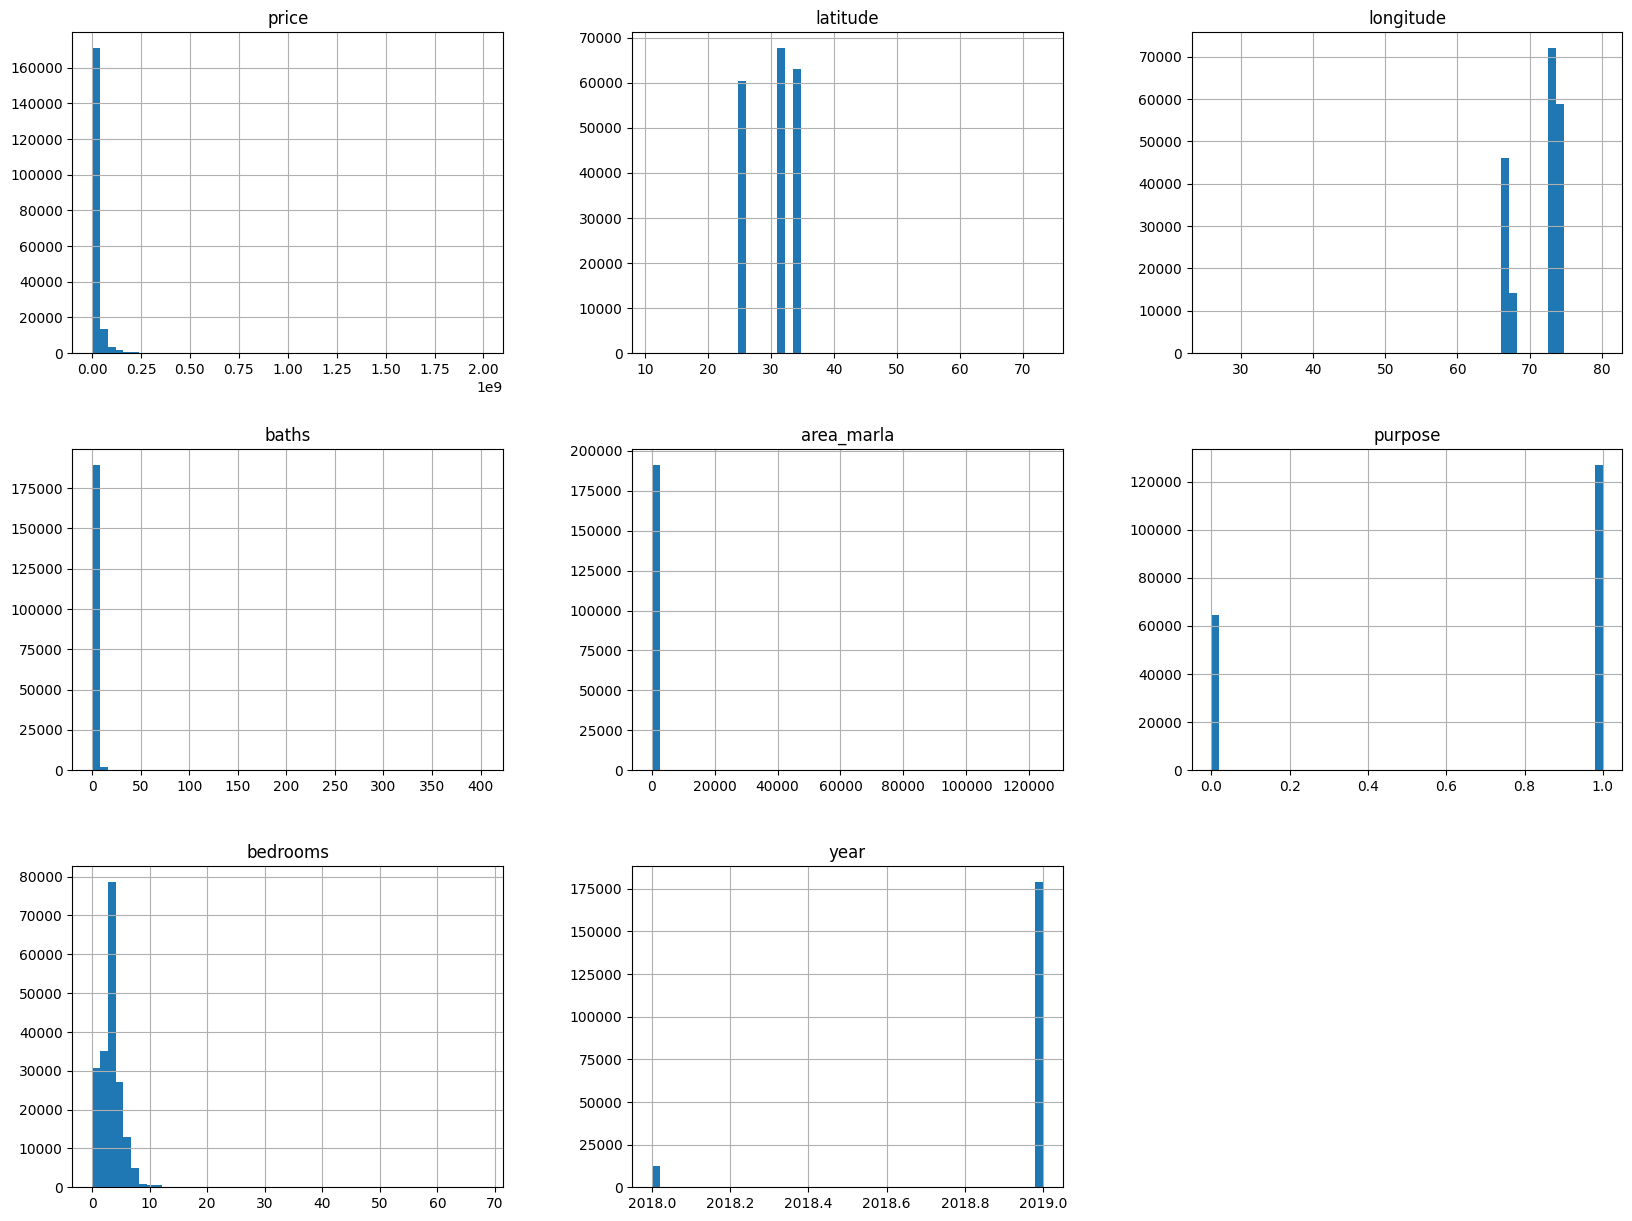

In [11]:
import matplotlib.pyplot as plt 
housing.hist(bins=50, figsize=(20,15))
plt.show

##huh, we can see that some houses have a price of zero! 
##that's a problem, so we will either drop the rows which contains that price or
##we could change the price to the average of all the prices 

In [12]:
housing.loc[housing['price'] == 0]

,price,latitude,longitude,baths,area_marla,purpose,bedrooms,year
70880,0,33.598593,73.018003,0,5.0,0,0,2019
97464,0,25.053956,67.253365,0,160.0,1,0,2019
140353,0,33.530556,73.061264,0,10.0,1,0,2019


In [13]:
##dropping all the columns where price is zero
housing.drop(housing[housing['price'] == 0].index, inplace = True)

In [14]:
housing.loc[housing['price'] == 0]

,price,latitude,longitude,baths,area_marla,purpose,bedrooms,year


#Feature Scaling

Feature scaling is an important preprocessing step in machine learning because it standardizes the features in the dataset to be on the same scale. Many algorithms assume that all features are centered around zero and have a similar range, and ignoring this assumption can lead to suboptimal performance or even model failure. Features with larger scales can dominantly influence the optimization process, leading to issues such as slow convergence or premature stopping.

Feature scaling can also improve the interpretability of features by making their contributions to the model more comparable. It plays a crucial role in distance-based algorithms where the distance between two data points is calculated. Euclidean distance is heavily influenced by the scales of the features. Also, some regularization techniques such as L1 and L2 are sensitive to the magnitude of the features.

There are several techniques for feature scaling, including standardization (z-score normalization), normalization (min-max scaling), and logarithmic scaling, among others. The choice of scaling technique depends on the characteristics of the dataset and the requirements of the algorithm. Overall, feature scaling is an important preprocessing step that can improve the performance of machine learning models and produce more reliable results.

In [15]:
X = housing.drop('price', axis=1)
Y = housing['price']


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y, 
                                                    test_size = 0.25, 
                                                    random_state=42)
df3 = pd.DataFrame(X_test)
df3

#In the above code snippet, the train_test_split function from the sklearn.model_selection module is imported. 
#This function is commonly used in machine learning workflows to split a dataset into training and testing sets, 
#allowing you to evaluate the performance of a model on unseen data.

#The train_test_split function takes several arguments including:

    #X: The feature matrix of the dataset

    #Y: The target variable vector of the dataset

    #test_size: A float representing the proportion of the dataset to include in the testing split

    #random_state: An optional seed value for the random number generator for reproducibility

#In the code snippet provided, the function is called on X and Y, with a test_size of 0.25, 
#meaning that 25% of the data will be used for testing. The random_state parameter is set to 42 to ensure reproducibility.

#After calling the train_test_split function, the resulting splits are assigned to X_train, X_test, Y_train, 
#and Y_test. Finally, the testing set is turned into a Pandas DataFrame using pd.DataFrame(X_test) and assigned to df3.

#Overall, this code snippet demonstrates the basic usage of the train_test_split function 
#and how it can be used to split a dataset into testing and training sets for use in a machine learning workflow.

,latitude,longitude,baths,area_marla,purpose,bedrooms,year
190740,33.683532,72.990410,1,4.3,0,1,2019
143082,31.502824,73.214350,0,10.0,1,4,2019
180277,33.485576,73.083930,6,10.0,1,5,2019
156376,24.955324,67.051063,3,16.0,0,3,2019
179210,31.412989,74.214785,1,5.0,1,2,2019
...,...,...,...,...,...,...,...
27724,24.821639,67.071691,4,20.0,1,4,2019
138227,31.375843,74.189715,6,10.0,1,5,2019
12071,31.375514,74.172735,4,5.0,1,3,2019
167200,33.689707,72.978911,3,10.2,1,3,2019


In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

def linear_reg(X_train, Y_train, X_test, Y_test):
    global reg_model_1
    scaler = MinMaxScaler()
    X_train_scaler = scaler.fit_transform(X_train)
    X_test_scaler = scaler.transform(X_test)
    Y_train_scaler = scaler.fit_transform(Y_train.values.reshape(-1,1)).ravel()
    Y_test_scaler = scaler.transform(Y_test.values.reshape(-1,1)).ravel()
    reg_model_1 = SGDRegressor()
    reg_model_1.fit(X_train_scaler, Y_train_scaler)
    pred = reg_model_1.predict(X_test_scaler)
    accuracy = mean_squared_error(Y_test_scaler, pred)
    return accuracy


lr_mse = linear_reg(X_train, Y_train, X_test, Y_test)
print(f'MSE  : {lr_mse}')


#The above code first scales the target variables using MinMaxScaler. 
#This is necessary to ensure that the target variables are on a similar scale to the feature variables, 
#which is required for the use of the SGDRegressor linear regression model.

#The linear_reg function takes the unscaled feature matrices and target vectors for the training and testing sets as input. 
#Inside the function, the MinMaxScaler is used to scale the feature variables using the fit_transform method for the training set
# and the transform method for the testing set. The same MinMaxScaler instance is used to transform the target variables as well, 
#using the fit_transform method for the training set and the transform method for the testing set.

#After scaling the variables, an instance of the SGDRegressor class is created and assigned to the reg_model variable,
# and then the fit method is called on reg_model to train the model on the scaled training set feature matrix X_train_scaler and target variable vector Y_train_scaler.

#After training the model, the predict method is called on reg_model to generate predictions for the scaled testing set feature matrix X_test_scaler.
# The mean_squared_error function is then used to calculate the mean squared error between
#the actual target variable values in the testing set Y_test_scaler and the predicted values in pred.

#Finally, the mean squared error is returned as the output of the linear_reg function, and printed using the print function along with an informative message.

MSE  : 0.00024828096082369293


In [62]:
import pickle

# Save the Linear Regression model
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(reg_model_1, f)

In [63]:
# 1. Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

def decision_tree(X_train, Y_train, X_test, Y_test):
    global reg_model_2 
    scaler = MinMaxScaler()
    X_train_scaler = scaler.fit_transform(X_train)
    X_test_scaler = scaler.transform(X_test)
    Y_train_scaler = scaler.fit_transform(Y_train.values.reshape(-1,1)).ravel()
    Y_test_scaler = scaler.transform(Y_test.values.reshape(-1,1)).ravel()
    reg_model_2 = DecisionTreeRegressor()
    reg_model_2.fit(X_train_scaler, Y_train_scaler)
    pred = reg_model_2.predict(X_test_scaler)
    accuracy = mean_squared_error(Y_test_scaler, pred)
    return accuracy


dt_mse = decision_tree(X_train, Y_train, X_test, Y_test)
print(f'MSE  : {dt_mse}')


#code performs decision tree regression on a dataset using the DecisionTreeRegressor class from the sklearn.tree module,
# and evaluates its performance using mean squared error.

#The decision_tree function takes unscaled feature matrices
# and target vectors for the training and testing sets as input, with similar steps to the linear_reg function with the inclusion of the decision tree specific parameters. Inside the function, the MinMaxScaler is used to scale the feature variables using the fit_transform method for the training set and the transform method for the testing set. The same MinMaxScaler instance is used to transform the target variables as well, using the fit_transform method for the training set and the transform method for the testing set.

#After scaling the variables, an instance of the DecisionTreeRegressor class is created and assigned to the reg_model_2 variable, 
#and then the fit method of the model is called on X_train_scaler and Y_train_scaler to train the decision tree regression model.

#After training the model, the predict method is called on reg_model_2 to generate predictions for the scaled testing set feature matrix X_test_scaler.
# The mean_squared_error function is then used to calculate the mean squared error between
# the actual target variable values in the testing set Y_test_scaler and the predicted values in pred.

#Finally, the mean squared error is returned as the output of the decision_tree function, and printed using the print function along with an informative message.

MSE  : 6.236321712582906e-05


In [65]:
# Save the decision tree Regression model
with open('decision_tree_regression_model.pkl', 'wb') as f:
    pickle.dump(reg_model_2, f)

In [66]:
#the below code demonstrates how to perform random forest regression on a dataset and evaluate its performance using mean squared error.

# 1. Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def rand_forest(X_train, Y_train, X_test, Y_test):
    global reg_model_3
    scaler = MinMaxScaler()
    X_train_scaler = scaler.fit_transform(X_train)
    X_test_scaler = scaler.transform(X_test)
    Y_train_scaler = scaler.fit_transform(Y_train.values.reshape(-1,1)).ravel()
    Y_test_scaler = scaler.transform(Y_test.values.reshape(-1,1)).ravel()
    reg_model_3 = RandomForestRegressor(n_estimators=300, max_features='sqrt', max_depth=5, random_state=18)
    reg_model_3.fit(X_train_scaler, Y_train_scaler)
    pred = reg_model_3.predict(X_test_scaler)
    accuracy = mean_squared_error(Y_test_scaler, pred)
    return accuracy


rf_mse = rand_forest(X_train, Y_train, X_test, Y_test)
print(f'MSE  : {rf_mse}')


MSE  : 0.00011789374626998503


In [67]:
# Save the random forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(reg_model_3, f)

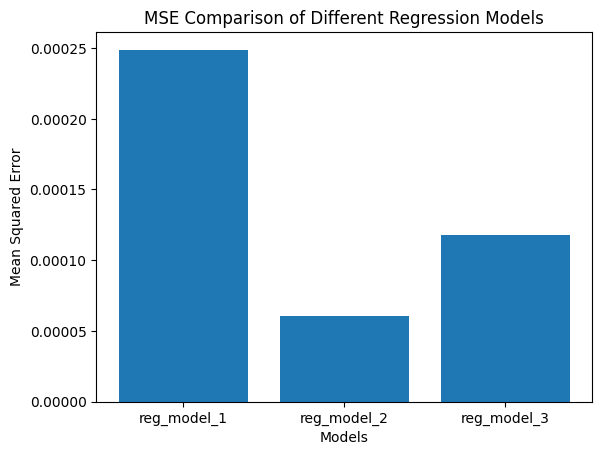

In [44]:
models = ['reg_model_1', 'reg_model_2', 'reg_model_3']
mse_scores = [lr_mse, dt_mse, rf_mse]

plt.bar(models, mse_scores)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison of Different Regression Models')
plt.show()

##fine tuning
##ill be using gridsearchcv and the code that I got from 'hands on machine learning' 

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

def decision_tree_2(X_train, Y_train, X_test, Y_test):
    scaler = MinMaxScaler()
    X_train_scaler = scaler.fit_transform(X_train)
    
    X_test_scaler = scaler.transform(X_test)
    Y_train_scaler = scaler.fit_transform(Y_train.values.reshape(-1,1)).ravel()
    Y_test_scaler = scaler.transform(Y_test.values.reshape(-1,1)).ravel()
    param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
    reg_model_2 = DecisionTreeRegressor()
    grid_search = GridSearchCV(estimator=reg_model_2, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

    grid_search.fit(X_train_scaler, Y_train_scaler)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaler)  
    mse = mean_squared_error(Y_test_scaler, y_pred)
    return mse

mse2 = decision_tree_2(X_train, Y_train, X_test, Y_test)
print("Mean Squared Error:", mse2)

Mean Squared Error: 6.0467597929688145e-05


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def random_forest_2(X_train, Y_train, X_test, Y_test):
    scaler = MinMaxScaler()
    X_train_scaler = scaler.fit_transform(X_train)
    X_test_scaler = scaler.transform(X_test)
    Y_train_scaler = scaler.fit_transform(Y_train.values.reshape(-1,1)).ravel()
    Y_test_scaler = scaler.transform(Y_test.values.reshape(-1,1)).ravel()
    param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
    reg_model_3 =  RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=reg_model_3, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

    grid_search.fit(X_train_scaler, Y_train_scaler)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaler)
    mse = mean_squared_error(Y_test_scaler, y_pred)
    return mse


mse3 = decision_tree_2(X_train, Y_train, X_test, Y_test)
print("Mean Squared Error:", mse3)



Mean Squared Error: 6.0467597657953735e-05


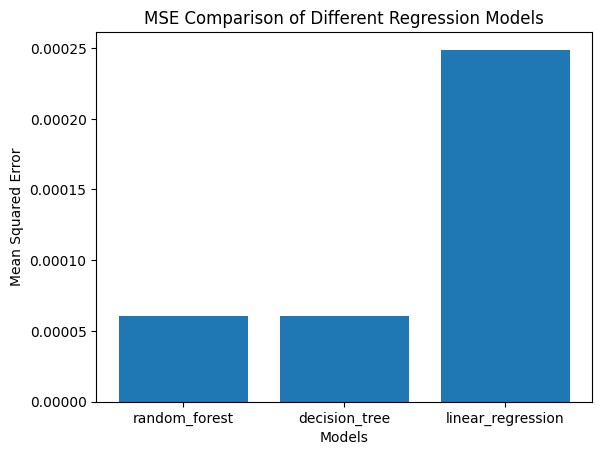

In [55]:
models = ['random_forest', 'decision_tree', 'linear_regression']
mse_scores = [mse3, mse2,lr_mse ]

plt.bar(models, mse_scores)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison of Different Regression Models')
plt.show()

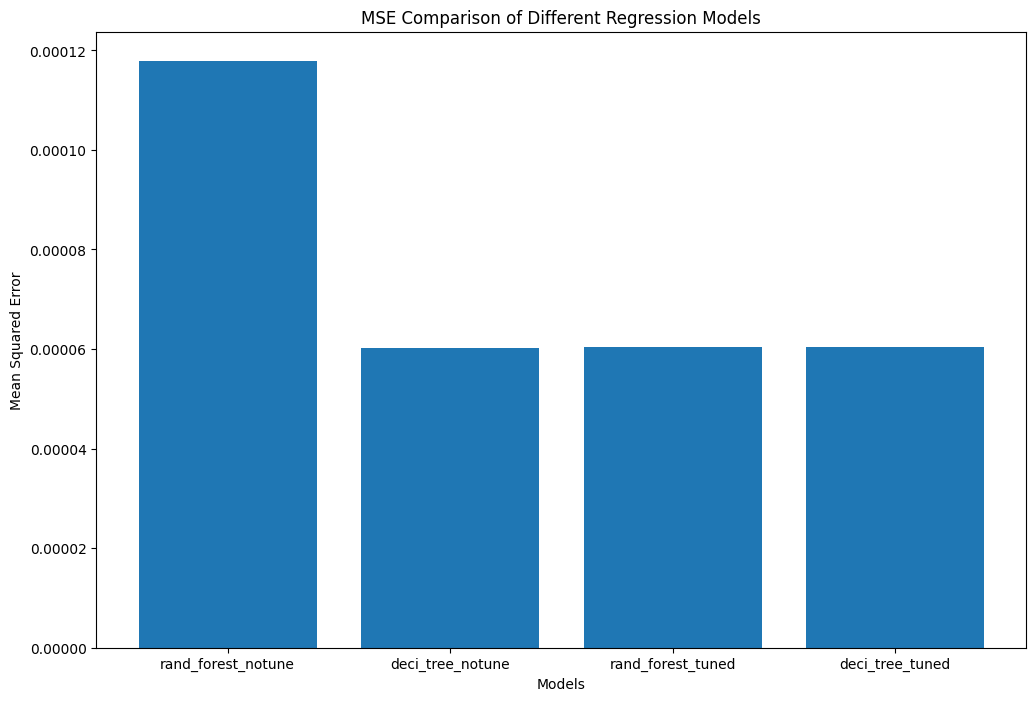

In [58]:
models = ['rand_forest_notune', 'deci_tree_notune', 'rand_forest_tuned', 'deci_tree_tuned']
mse_scores = [rf_mse, dt_mse, mse3, mse2]

plt.figure(figsize=(12, 8))  # Set the plot size (width, height) in inches
plt.bar(models, mse_scores)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison of Different Regression Models')
plt.show()

#saving our models

To save Linear Regression, Decision Tree, and Random Forest models in Google Colab, you can use the pickle library in Python. First, train the models and then save them as pickle files.

In [60]:
import pickle

# Save the Linear Regression model
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(reg_model_1, f)

# Save the Decision Tree model
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(reg_model_2, f)

# Save the Random Forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(reg_model_3, f)

NameError: ignored